In [1]:
import flim
from flim.experiments import utils
from flim.models.lcn import LCNCreator

import torch

import numpy as np

import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

In [3]:
architecture = utils.load_architecture('arch.json')

In [4]:
# the images are in LAB color space
images, markers = utils.load_images_and_markers('images_and_markers')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


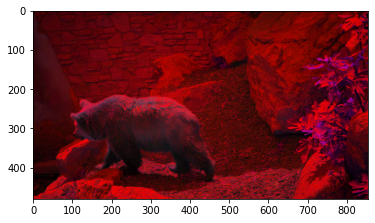

In [5]:
plt.imshow(images[0])

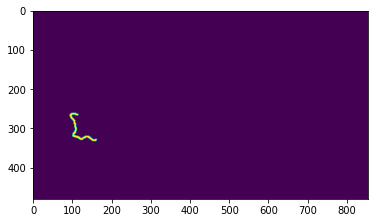

In [6]:
plt.imshow(markers[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


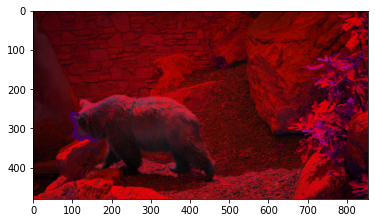

In [7]:
plt.imshow(images[0])

x, y = np.where(markers[0] != 0)

plt.scatter(y, x, s=1, c=markers[0, x, y])


In [8]:
encoder = utils.build_model(architecture, images=images, markers=markers, device=device)

In [9]:
x = torch.from_numpy(images).permute(0, 3, 1, 2).float().to(device)
features = encoder.forward(x)

In [10]:
print(features.size())

torch.Size([1, 64, 480, 854])


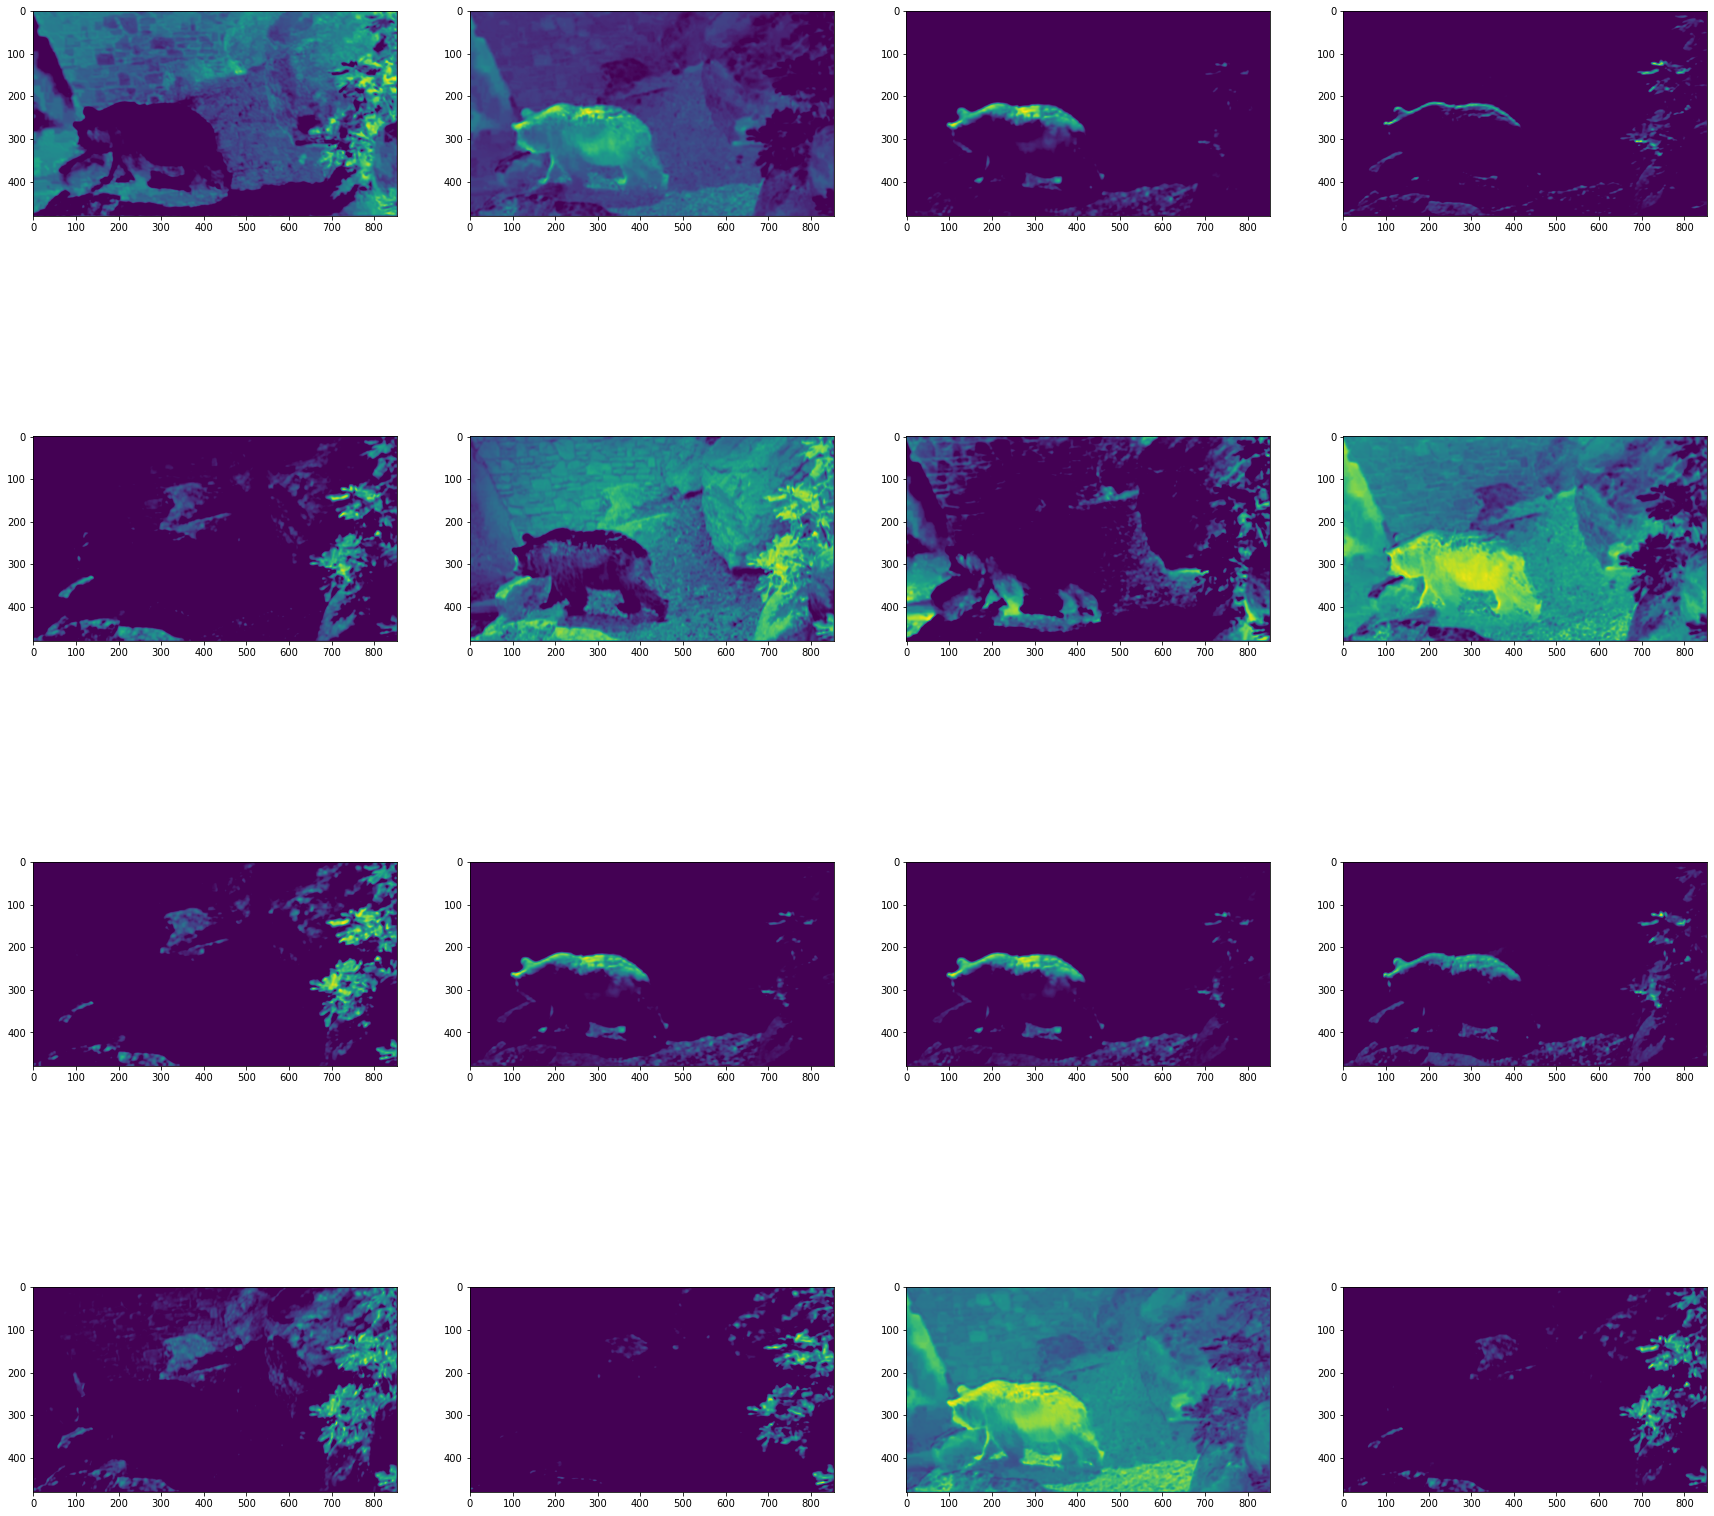

In [11]:
#showing a few features
fig, axs = plt.subplots(4,4, figsize=(30,30))

for i in range(16):
    c1=i//4
    c2=i%4
    axs[c1][c2].imshow(features[0, i, :].detach().cpu())